<a href="https://www.kaggle.com/code/pranayrishith16/wine-quality-wip?scriptVersionId=134722587" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [519]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import statsmodels.api as sm
from scipy.stats import mstats,boxcox

In [521]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [522]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [524]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Preprocessing

There is no need of any cleaning or missing value processing as the data is already cleaned.

# Data visualization

## Univariate Analysis

0.9827514413284587


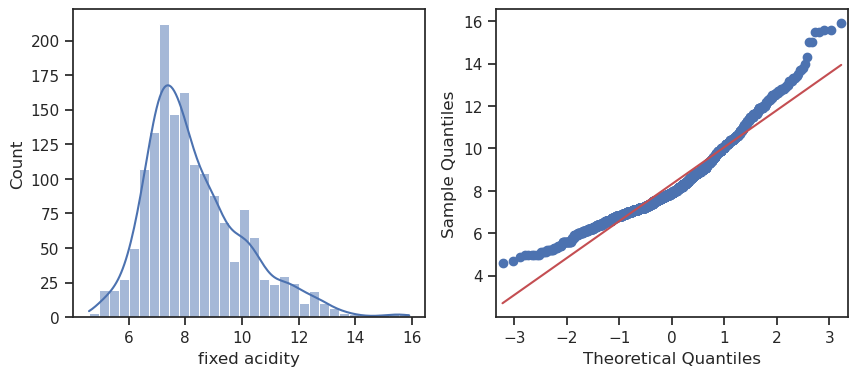

In [525]:
print(data['fixed acidity'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='fixed acidity', kde=True,ax=axes[0])
sm.qqplot(data['fixed acidity'],line='s',ax=axes[1])

plt.show()

Fixed acidity is right skewed. The value is over 0.5. a Q-Q plot is trying to answer the question: “How similar are the quantiles in my dataset compared to what the quantiles of my dataset would be if my dataset followed a theoretical probability distribution?” The theoretical distribution in the following examples is the Gaussian (Normal) distribution with mean 0 and standard deviation 1.

0.6715925723840199


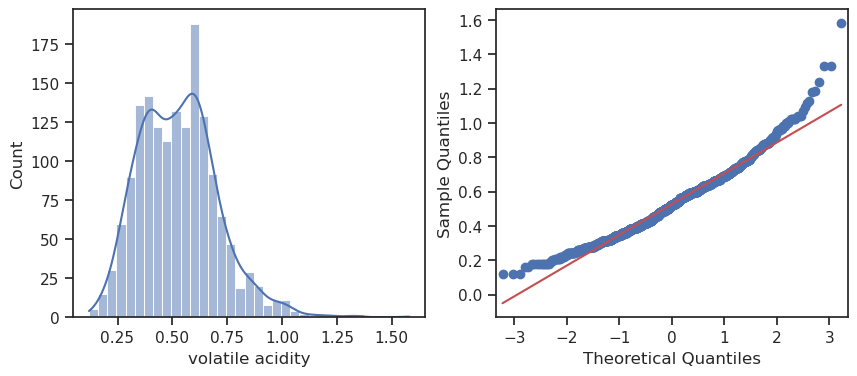

In [526]:
print(data['volatile acidity'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='volatile acidity', kde=True,ax=axes[0])
sm.qqplot(data['volatile acidity'],line='s',ax=axes[1])

plt.show()

Volatile acidity not a lot right skewed. The value is just over 0.5. So we will just put this aside for some time.

0.3183372952546368


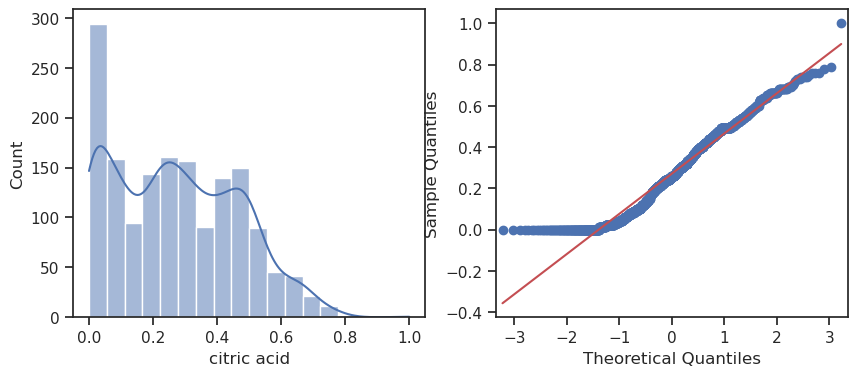

In [527]:
print(data['citric acid'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='citric acid', kde=True,ax=axes[0])
sm.qqplot(data['citric acid'],line='s',ax=axes[1])

plt.show()

citric acid is right skewed highly. The skew value is off the charts. Observing the plot we can see citric acid has uniform distribution.

4.54065542590319


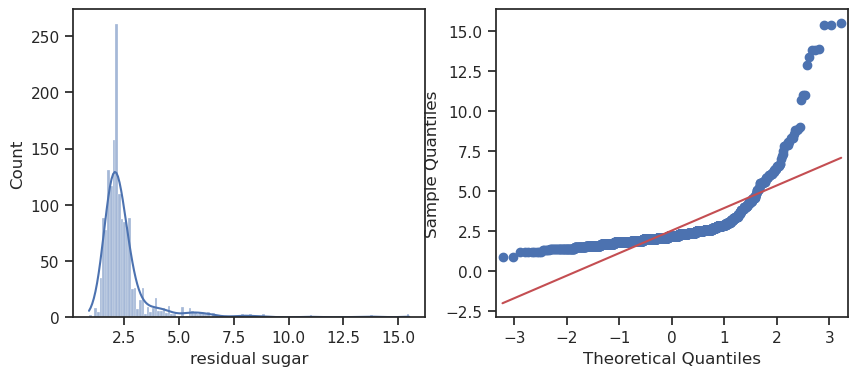

In [528]:
print(data['residual sugar'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='residual sugar', kde=True,ax=axes[0])
sm.qqplot(data['residual sugar'],line='s',ax=axes[1])

plt.show()

Residual sugar highly right skewed. Residual sugar is a lot off the charts.

5.680346571971722


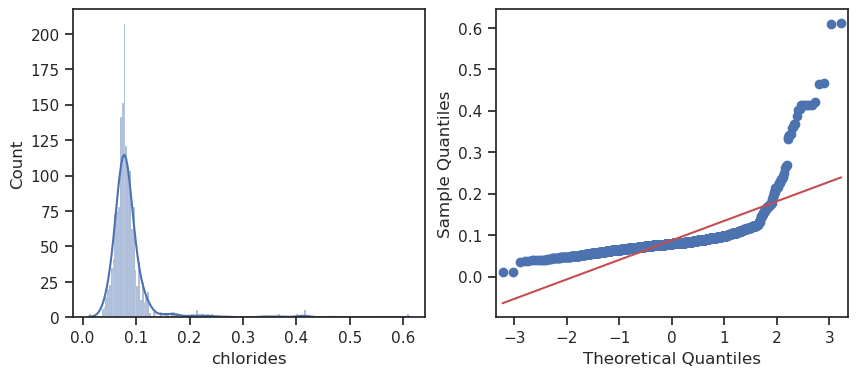

In [529]:
print(data['chlorides'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='chlorides', kde=True,ax=axes[0])
sm.qqplot(data['chlorides'],line='s',ax=axes[1])

plt.show()

chlorides highly right skewed with value is over 5 which is 10 times the ordinary value.


1.250567293314441


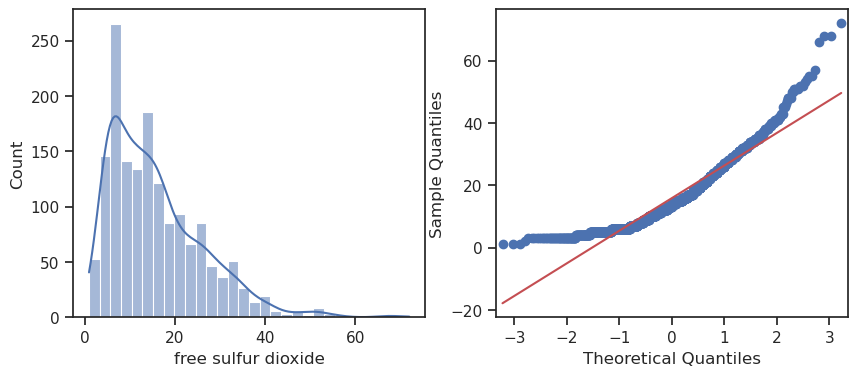

In [530]:
print(data['free sulfur dioxide'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='free sulfur dioxide', kde=True,ax=axes[0])
sm.qqplot(data['free sulfur dioxide'],line='s',ax=axes[1])

plt.show()

free sulfur dioxide is right skewed based on the value.


1.515531257594554


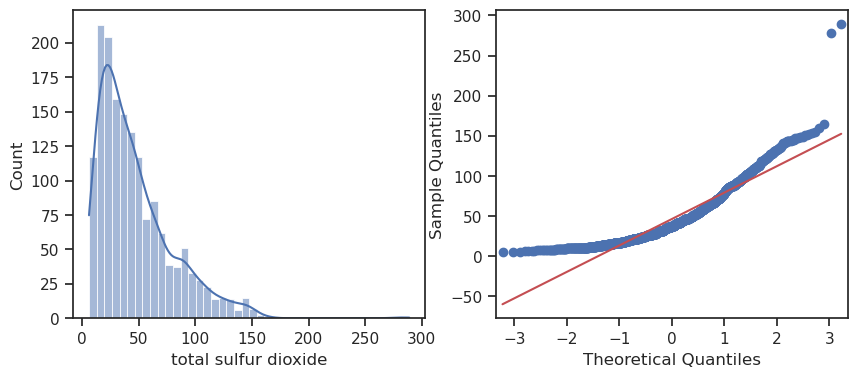

In [531]:
print(data['total sulfur dioxide'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='total sulfur dioxide', kde=True,ax=axes[0])
sm.qqplot(data['total sulfur dioxide'],line='s',ax=axes[1])

plt.show()

Total sulphur dioxide highly right skewed.


0.07128766294927483


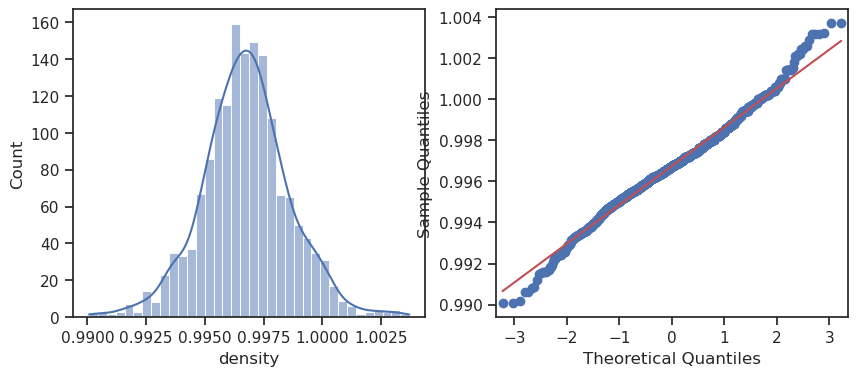

In [532]:
print(data['density'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='density', kde=True,ax=axes[0])
sm.qqplot(data['density'],line='s',ax=axes[1])

plt.show()

Well density is perfectly skewed so there are no issues here.

0.19368349811284427


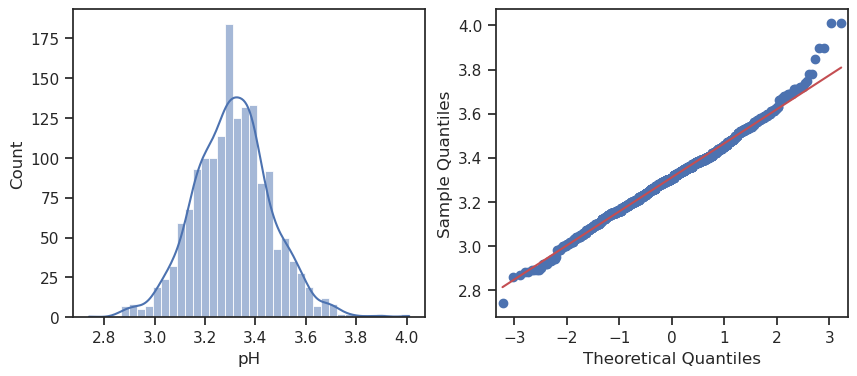

In [533]:
print(data['pH'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='pH', kde=True,ax=axes[0])
sm.qqplot(data['pH'],line='s',ax=axes[1])

plt.show()

Same story here. No skewness in pH.

2.4286723536602945


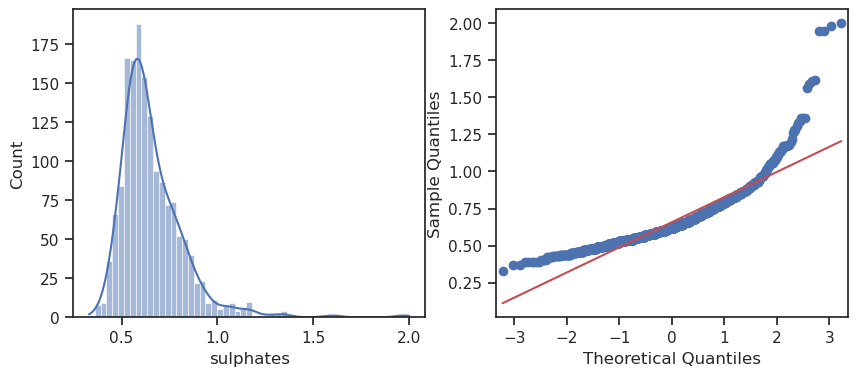

In [534]:
print(data['sulphates'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='sulphates', kde=True,ax=axes[0])
sm.qqplot(data['sulphates'],line='s',ax=axes[1])

plt.show()

Sulphates is right skewed highly.

0.8608288068888538


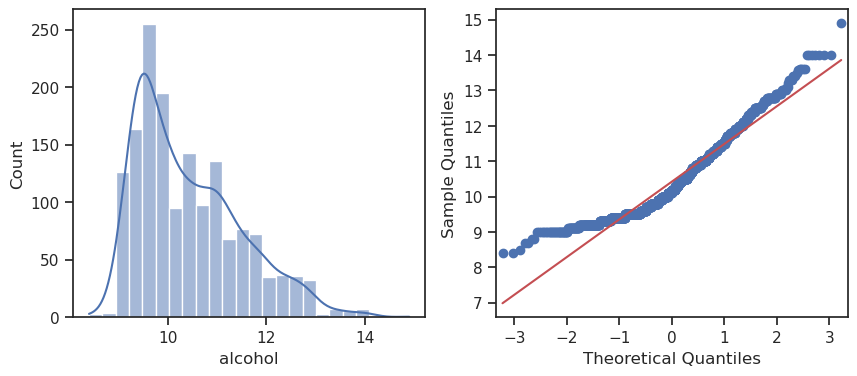

In [535]:
print(data['alcohol'].skew())
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='alcohol', kde=True,ax=axes[0])
sm.qqplot(data['alcohol'],line='s',ax=axes[1])

plt.show()

Alcohol also has right skewed.

On conclusion, there are a lot of features with skewness. most of the are right skewness cause most of the values are on the left. I will treat this variable after visualizing all my assumptions.

## Bivariate Analysis

I have never tasted wine so i dont know what might factor the quality value. Buti have some assumptions, Alcohol, density, pH, citric acid and acidity. I think these might affect the quality. Density cause you dont want the wine to be thick, pH cause you dont want the wine to burn your inside. Acidity same as ph reason.

In [536]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

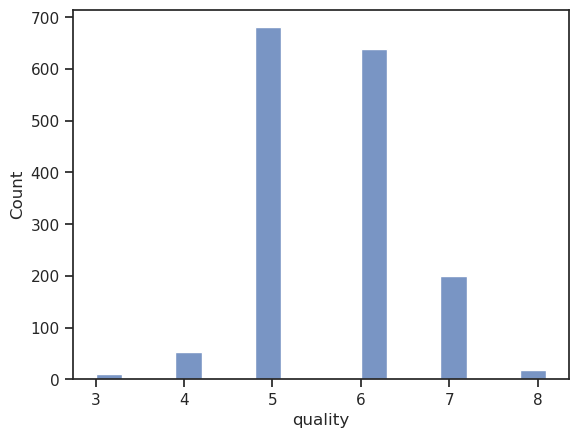

In [537]:
sns.set_theme(style="ticks")

sns.histplot(data,x='quality',binwidth=0.3,cbar=True,)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

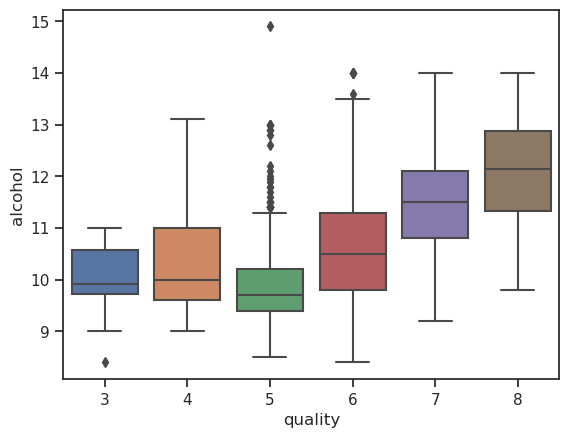

In [538]:
sns.boxplot(data,y='alcohol',x='quality')

<AxesSubplot:xlabel='quality', ylabel='density'>

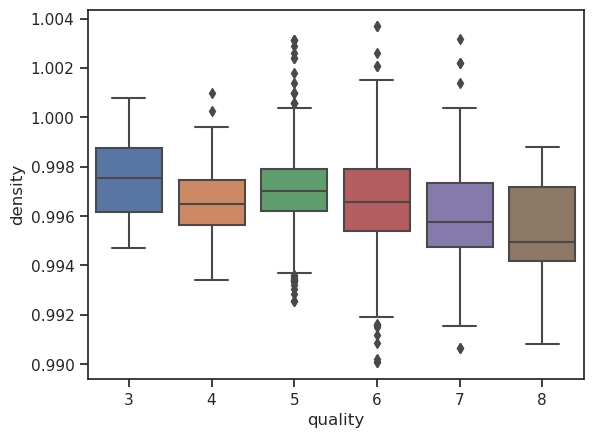

In [539]:
sns.boxplot(data,y='density',x='quality')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

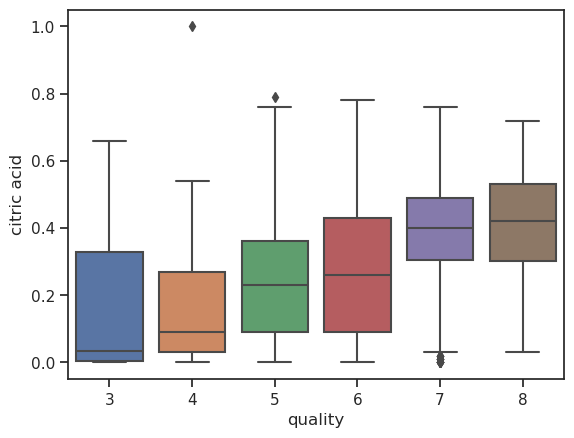

In [540]:
sns.boxplot(data,y='citric acid',x='quality')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

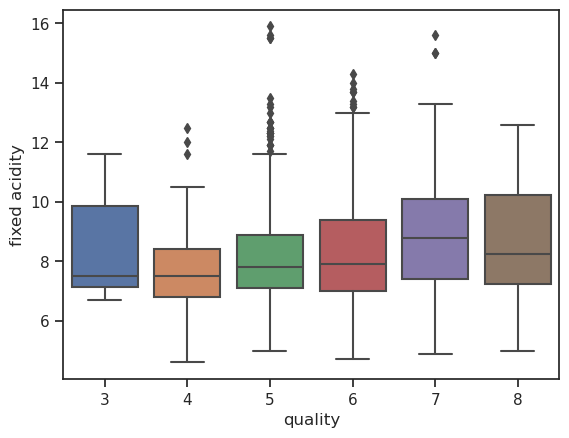

In [541]:
sns.boxplot(data,y='fixed acidity',x='quality')

<AxesSubplot:xlabel='quality', ylabel='pH'>

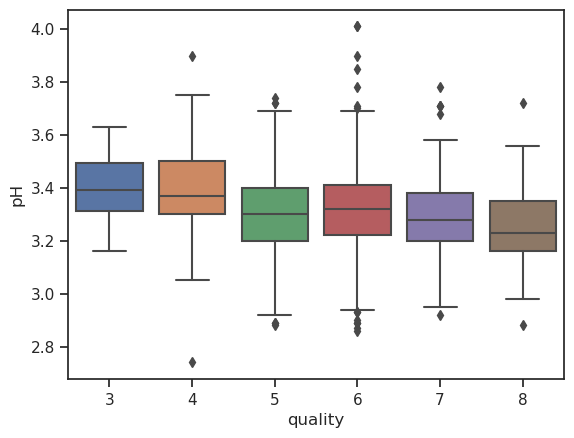

In [542]:
sns.boxplot(data,y='pH',x='quality')

Now my assumptions done, we will work on to find any more relations using corr map.

<AxesSubplot:>

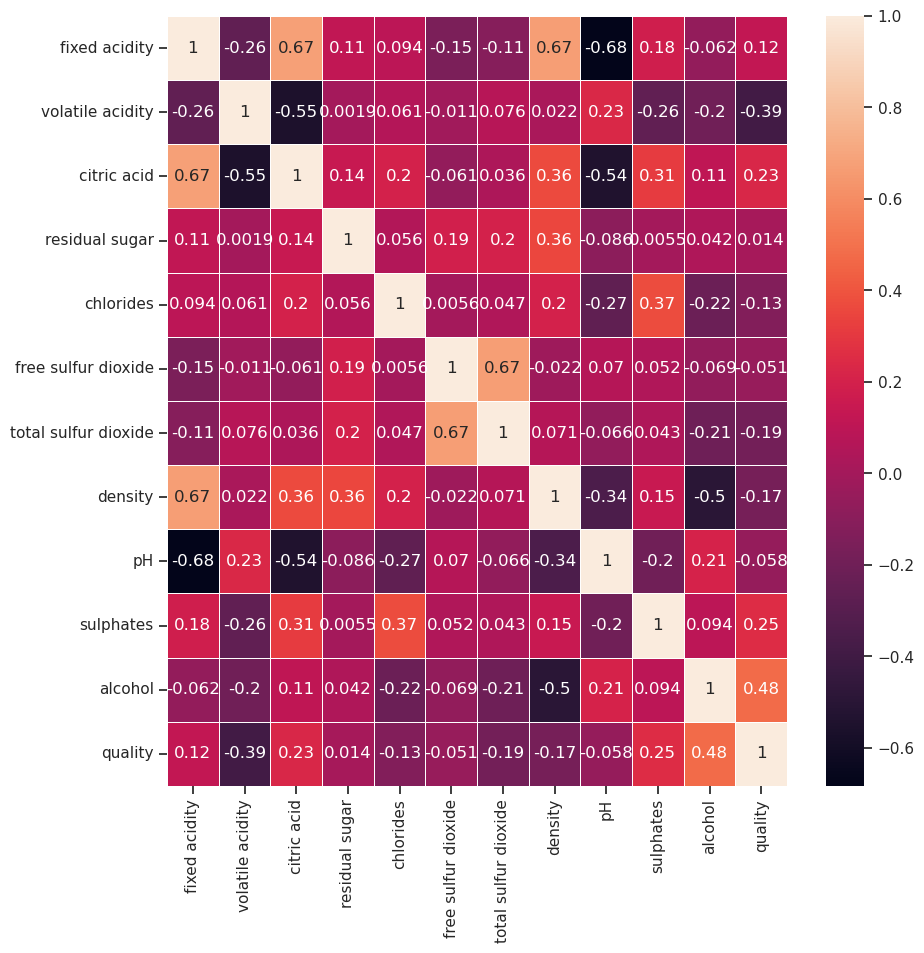

In [543]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,ax=ax,linewidth=0.5)

Based on my assumptions, pH is same as visualized. Density is also same. pH and Density are the features i mentioned that they might be correlated to quality but upon visualizing we came to a conclusion they might not have a correlation and that is true with this map.

### Treating skewness

0.3939149942929756


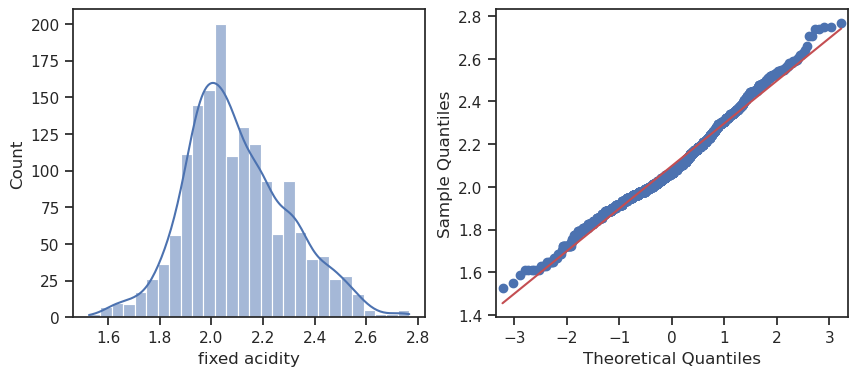

In [544]:
# data['fixed acidity'] = scaler.fit_transform(data[['fixed acidity']])

data['fixed acidity'] = np.log(data['fixed acidity'])
print(data['fixed acidity'].skew())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='fixed acidity', kde=True,ax=axes[0])
sm.qqplot(data['fixed acidity'],line='s',ax=axes[1])

plt.show()

-0.533798952924699


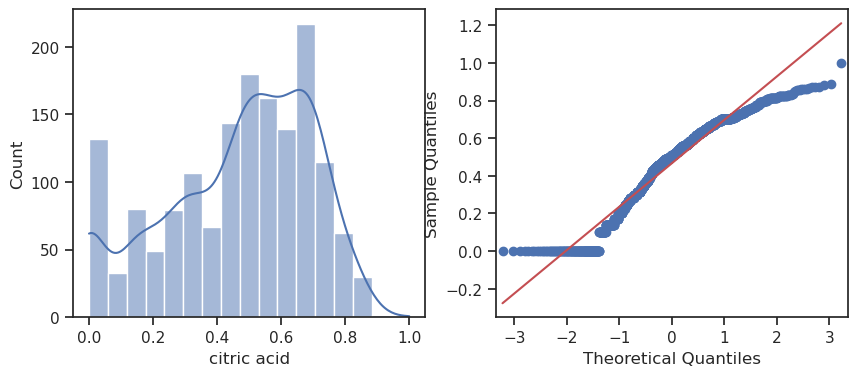

In [545]:
data['citric acid'] = data['citric acid'].apply(np.sqrt)
print(data['citric acid'].skew())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='citric acid', kde=True,ax=axes[0])
sm.qqplot(data['citric acid'],line='s',ax=axes[1])

plt.show()

1.8068638195807207


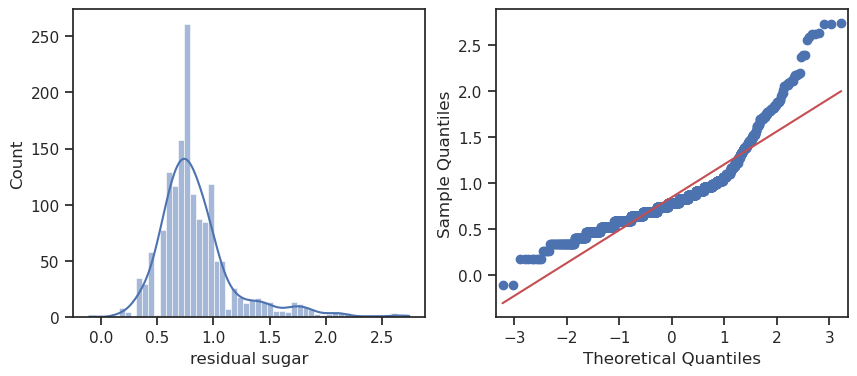

In [546]:
data['residual sugar'] = np.log(data['residual sugar'])
print(data['residual sugar'].skew())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='residual sugar', kde=True,ax=axes[0])
sm.qqplot(data['residual sugar'],line='s',ax=axes[1])

plt.show()

Yet after using log transformation, the skewness is 1.8. this is still not a good skewness score but the feature is very minimally correlated to quality so i will leave it like this.

0.3943994291582427


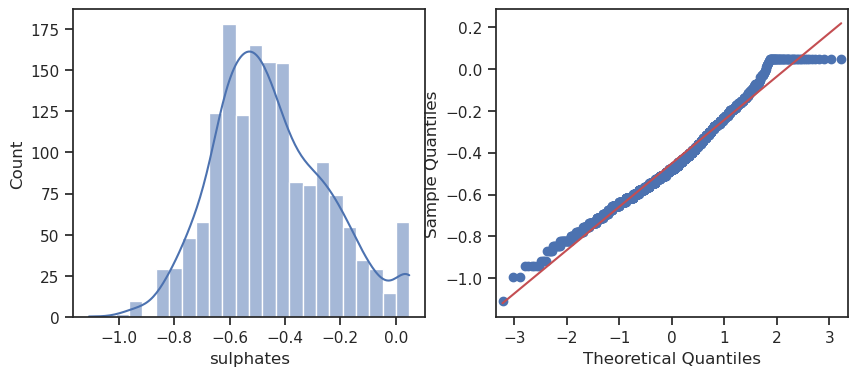

In [547]:
data['sulphates'] = mstats.winsorize(data['sulphates'], limits=[0, 0.03])

data['sulphates'] = np.log(data['sulphates'])
print(data['sulphates'].skew())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='sulphates', kde=True,ax=axes[0])
sm.qqplot(data['sulphates'],line='s',ax=axes[1])

plt.show()

0.10936702240086463


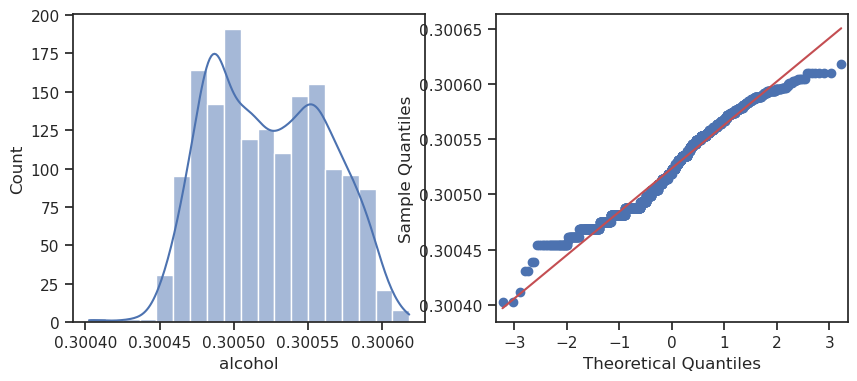

In [548]:
# data['alcohol'] = mstats.winsorize(data['alcohol'], limits=[0, 0.02])

data['alcohol'],lamda = boxcox(data['alcohol'])
print(data['alcohol'].skew())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=data, x='alcohol', kde=True,ax=axes[0])
sm.qqplot(data['alcohol'],line='s',ax=axes[1])

plt.show()